시계열 분해
추세, 계절성, 잔차로 분해하는 기법
Addictive, Multiplicative 뭐가 맞는지


In [33]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
data=pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/arima_data.csv",names=['day','price'])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [35]:
data['day']=pd.to_datetime(data['day'],format='%Y-%m-%d')
data.set_index('day',inplace=True)
data.head(3)

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190


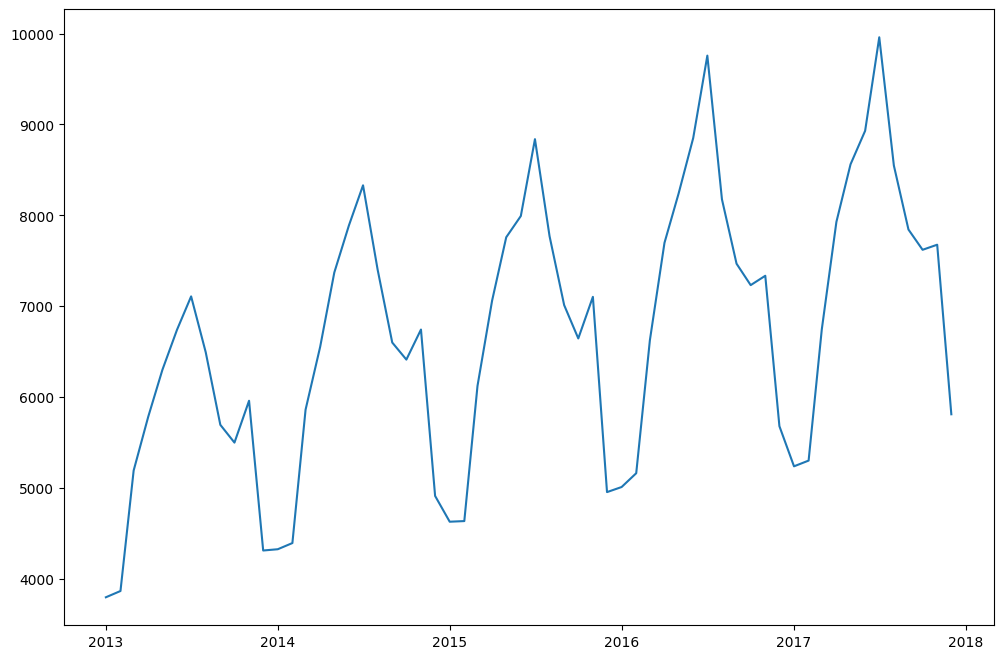

In [36]:
import matplotlib.pyplot as plt
plt.plot(data.index,data['price'])

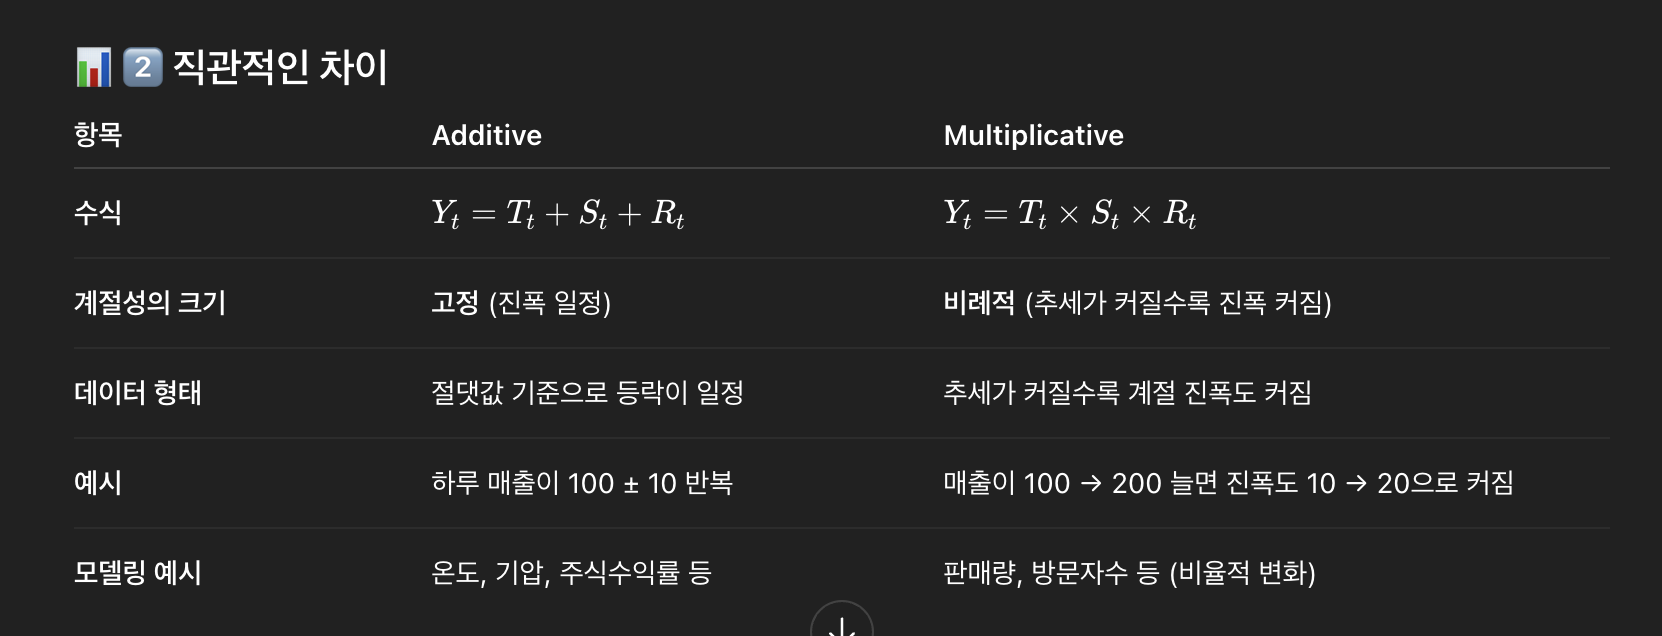

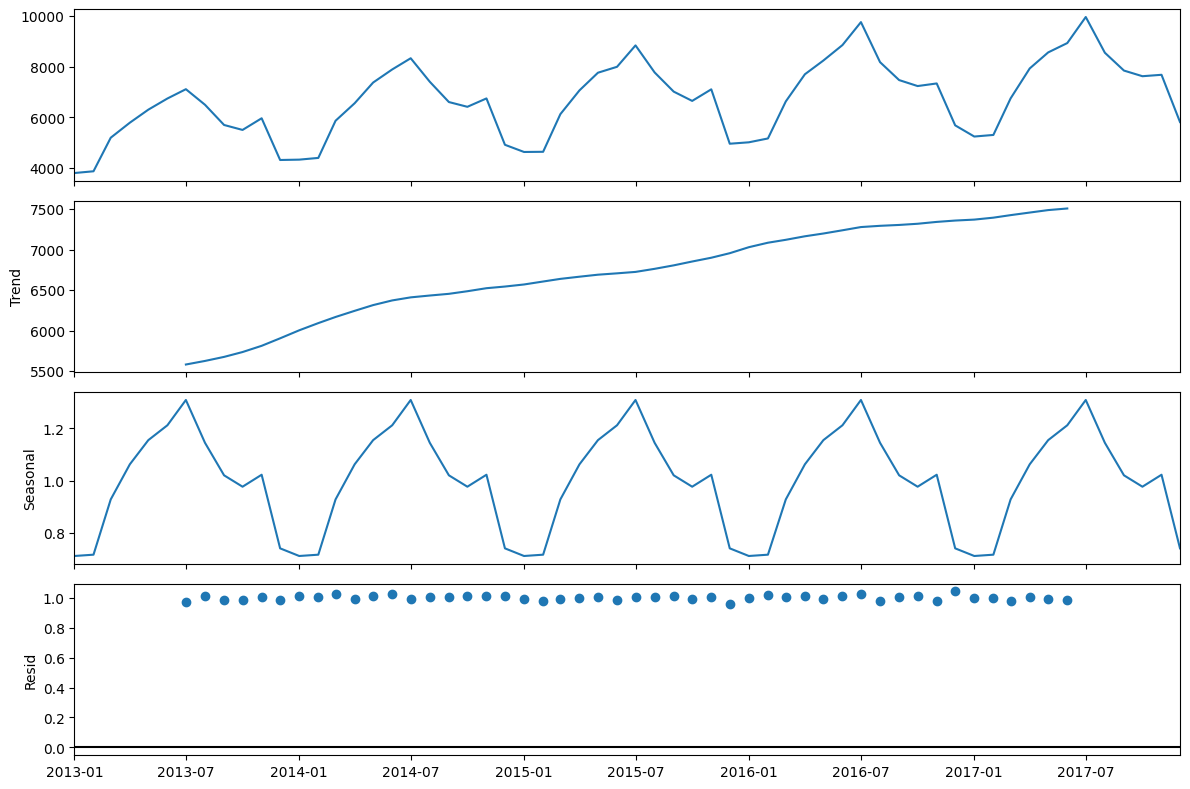

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts=data
result=seasonal_decompose(ts,model='multiplicative')
plt.rcParams['figure.figsize']=[12,8]
result.plot()
plt.show()

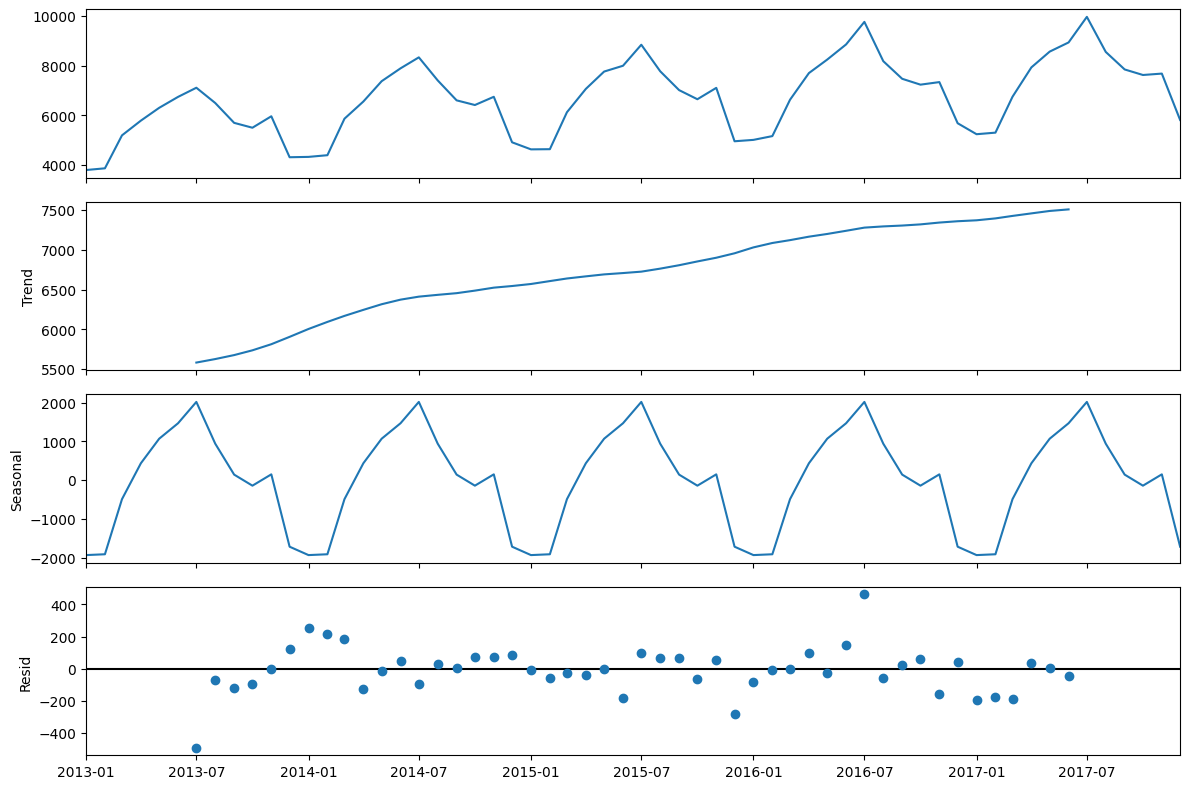

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts=data
result=seasonal_decompose(ts,model='addictive')
plt.rcParams['figure.figsize']=[12,8]
result.plot()
plt.show()

| 시계열 형태                       | 적절한 `regression` 값 |
| ---------------------------- | ------------------ |
| 평균만 있는 정상 시계열                | `'c'`              |
| **추세를 포함한 비정상 시계열**          | `'ct'`             |
| **이차 추세 포함**                 | `'ctt'`            |
| **평균도 없는 시계열 (ex: 무의미한 잔차)** | `'n'`              |

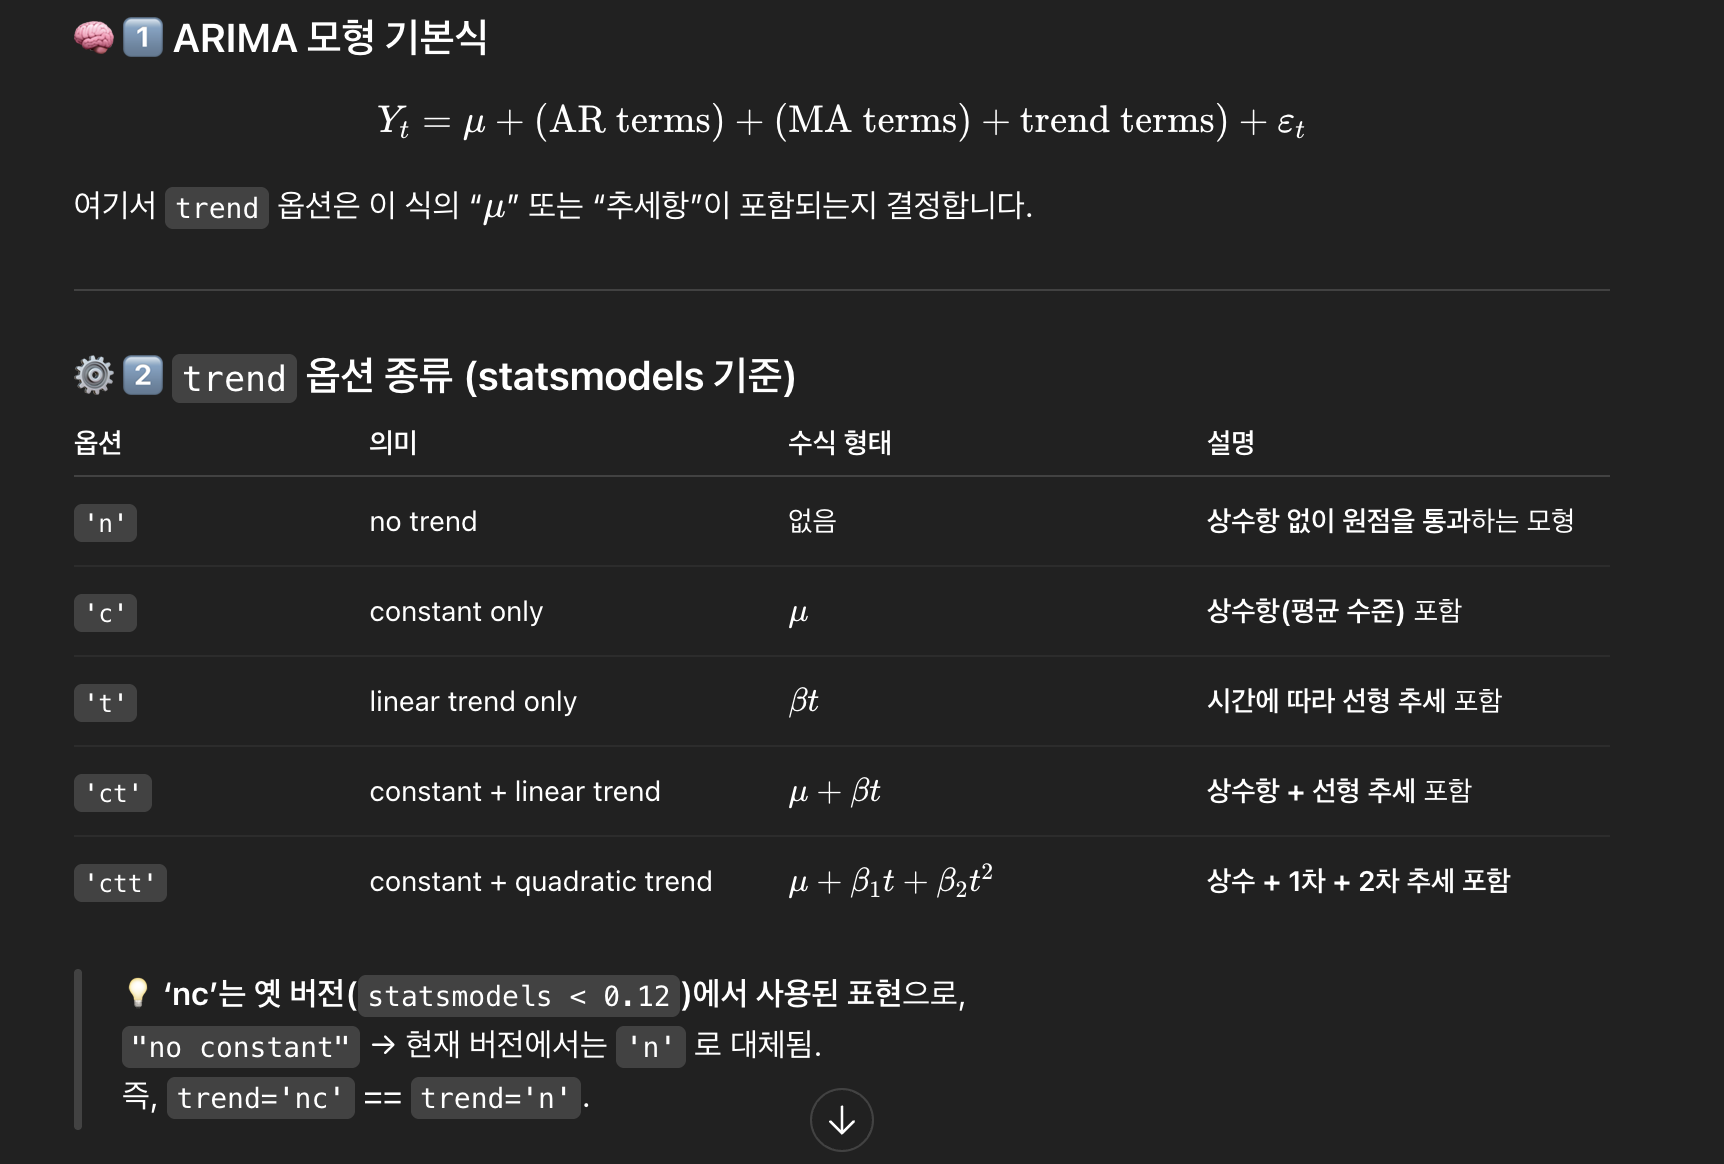

In [39]:
from statsmodels.tsa.stattools import adfuller
# ADF (Augmented Dickey–Fuller) Test,
# 즉 확장된 딕키-풀러 검정으로,
# 시계열이 정상성(stationarity) 을 만족하는지 판단하는 대표적인 통계적 방법입니다.
# 예시:
# 정상 시계열 → 노이즈, AR(1) 등
# 비정상 시계열 → 추세(trend)나 계절성이 있는 데이터 (예: GDP, 기온, 매출 등)
# 🧩 2️⃣ ADF (Augmented Dickey–Fuller) 검정의 목적
# ADF 검정은 시계열에 단위근(unit root) 이 존재하는지 확인합니다.
# 단위근이 있다 → 비정상 (non-stationary)
# 단위근이 없다 → 정상 (stationary)
# 즉, “데이터가 자기자신의 과거 값에 너무 의존해서 랜덤워크 형태인가?” 를 확인하는 거예요.
training = data[:'2016-12-01']
test=data.drop(training.index)
adf=adfuller(training,regression='ct') #h0 : 정상성을 갖지 않는다. h1 : 정상성을 가진다. 
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))

ADF Statistic: -1.9997199341327319
p-value: 0.6015863303794438


<Axes: xlabel='day'>

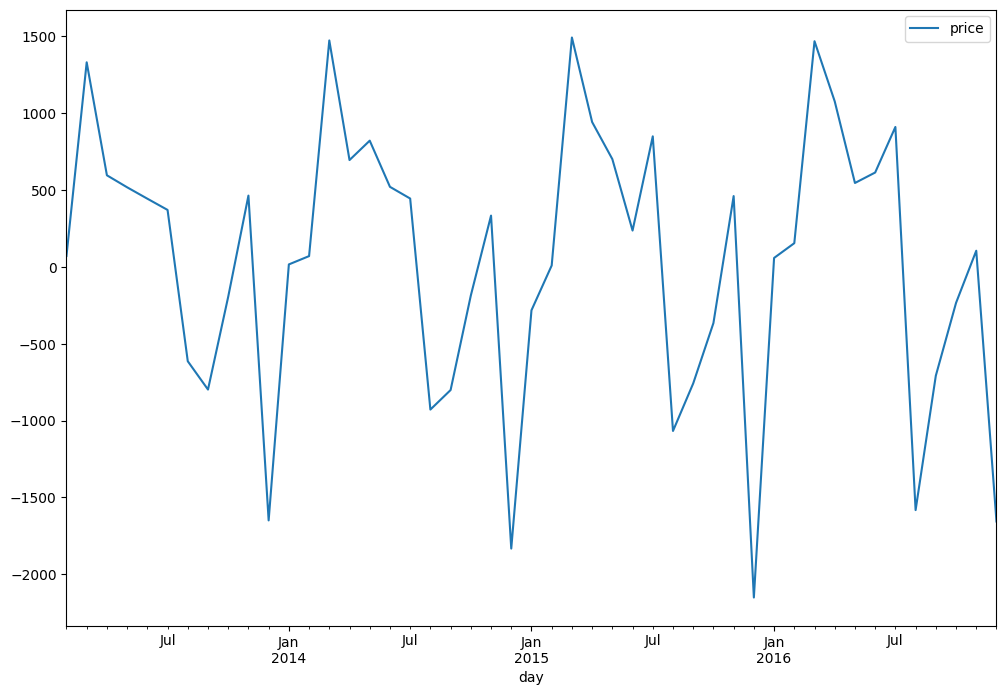

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

diff_data=training.diff(1)
diff_data=diff_data.dropna()
diff_data.plot()

In [41]:
adf=adfuller(diff_data)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))

ADF Statistic: -12.094547576926377
p-value: 2.085160639961547e-22


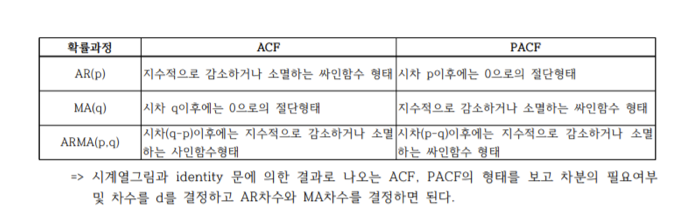

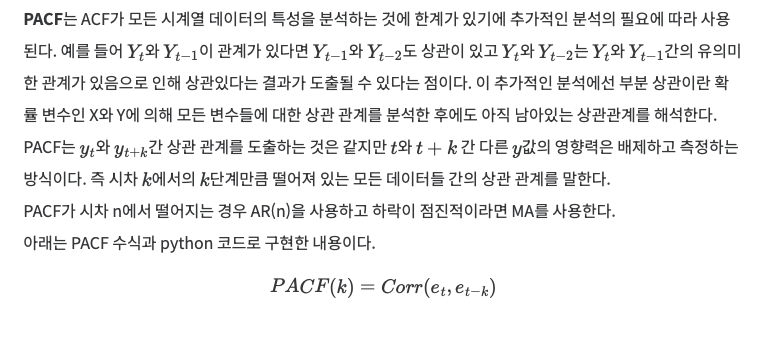

In [ ]:
def pacf(data, k):
    if k == 0:
        pacf_val = 1
    else:
        gamma_array = np.array([acf(data, k) for k in range(1, k + 1)])

        gamma_matrix = []
        for i in range(k):
            temp = [0] * k
            temp[i:] = [acf(data, j) for j in range(k - i)]     # making diagonal
            gamma_matrix.append(temp)

        gamma_matrix = np.array(gamma_matrix)
        gamma_matrix = gamma_matrix + gamma_matrix.T - np.diag(gamma_matrix.diagonal())     # making symmetric matrix
        pacf_val = np.linalg.inv(gamma_matrix).dot(gamma_array)[-1]
    return pacf_val
    



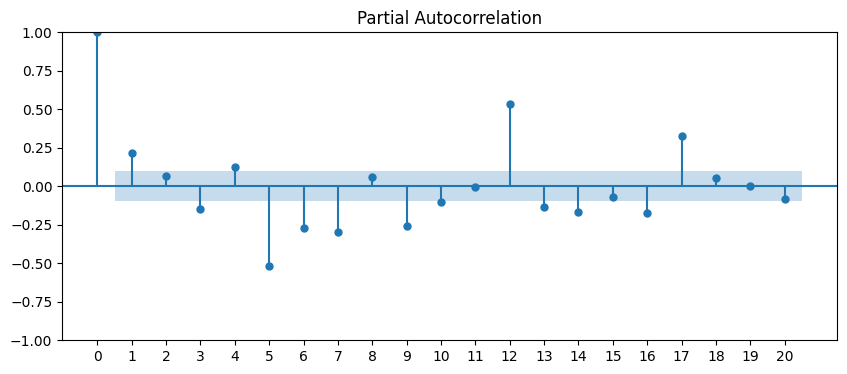

In [42]:
import numpy as np
fig, ax = plt.subplots(figsize=(10, 4))
plot_pacf(diff_data,lags=20, alpha=0.5, ax=ax)#절단점 직전에 값이 의미가 있음
ax.set_xticks(np.arange(0, 21, 1))  # 1 lag 단위로 tick

plt.show() 


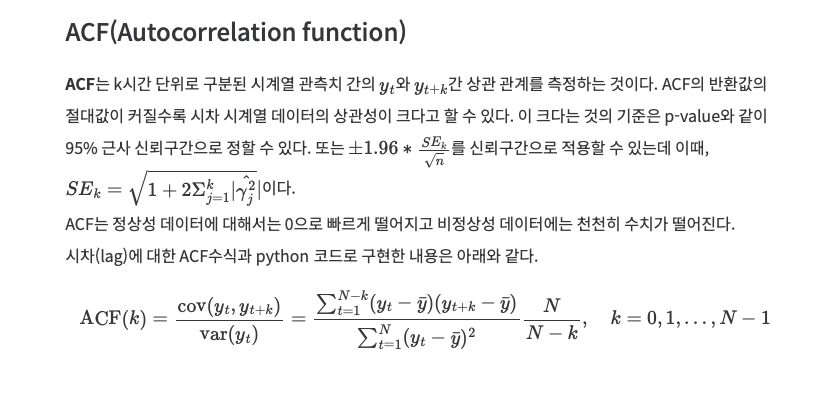

In [ ]:
def acf(data, k):
    data = np.array(data).reshape(-1)
    mean = data.mean()

    numerator = np.sum((data[:len(data)-k] - mean) * (data[k:] - mean))
    denominator = np.sum(np.square(data - mean))

    acf_val = numerator / denominator

    return acf_val

# [1.0, 0.1048904805897309, -0.0021663171476797435, 0.025054864781747933, -0.016516709724606914, 
# -0.038303324302299956, -0.025356924583006032, 0.005668275317742138, -0.03779181516554617, 
# -0.03389716988734305, -0.04605595433803343, 0.09043427594152544, -0.04105851291659383, 
# -0.03529945852644305, 0.03141655496394635, 0.030499542062679394]


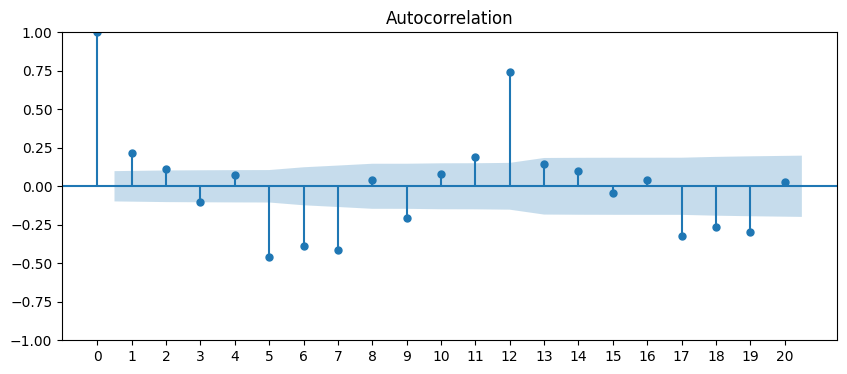

In [43]:
import numpy as np
fig, ax = plt.subplots(figsize=(10, 4))
plot_acf(diff_data,lags=20, alpha=0.5, ax=ax)#절단점 직전에 값이 의미가 있음
ax.set_xticks(np.arange(0, 21, 1))  # 1 lag 단위로 tick

plt.show() 


In [44]:
training

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298
2013-06-01,6739
2013-07-01,7107
2013-08-01,6492
2013-09-01,5693


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.875
Date:                Wed, 08 Oct 2025   AIC                            761.750
Time:                        23:37:03   BIC                            771.001
Sample:                    01-01-2013   HQIC                           765.231
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3167      0.190     -6.920      0.000      -1.690      -0.944
ar.L2         -0.3191      0.191     -1.670      0.095      -0.694       0.055
ma.L1          1.9692      0.244      8.074      0.0

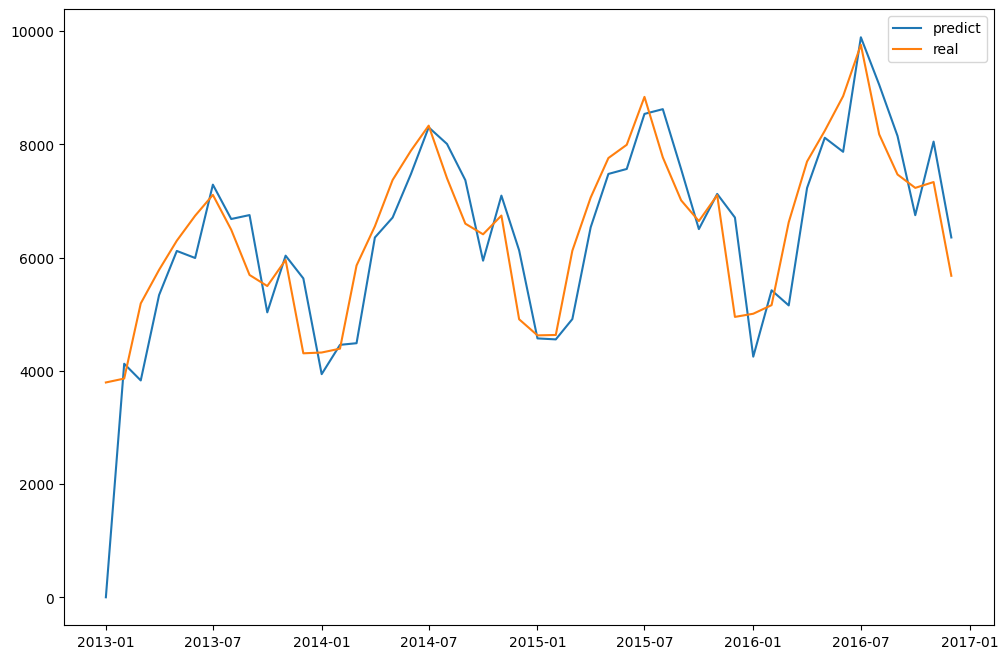

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(training,order=(2,1,2))
res=model.fit()
print(res.summary())
plt.plot(res.predict())
# forecast = model_fit.forecast(steps=24*7)
#arma_forecast = model_fit.predict(start='2023-01-01', end='2023-12-31')

plt.plot(training)
plt.legend(['predict','real'])
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.875
Date:                Wed, 08 Oct 2025   AIC                            761.750
Time:                        23:37:03   BIC                            771.001
Sample:                    01-01-2013   HQIC                           765.231
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3167      0.190     -6.920      0.000      -1.690      -0.944
ar.L2         -0.3191      0.191     -1.670      0.095      -0.694       0.055
ma.L1          1.9692      0.244      8.074      0.0

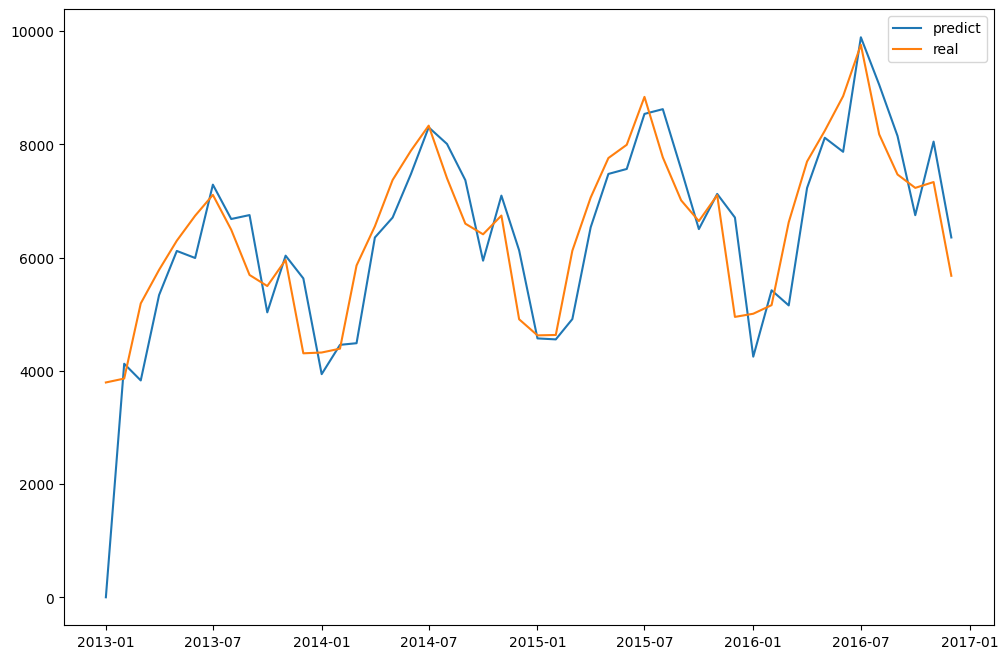

In [46]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(training,order=(2,1,2))
res=model.fit()
print(res.summary())
plt.plot(res.predict())
plt.plot(training)
plt.legend(['predict','real'])
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -376.749
Date:                Wed, 08 Oct 2025   AIC                            765.498
Time:                        23:37:04   BIC                            776.599
Sample:                    01-01-2013   HQIC                           769.676
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2876      0.452     -0.636      0.524      -1.173       0.598
ar.L2          0.7124      0.452      1.578      0.115      -0.173       1.598
ma.L1          0.8864      0.588      1.507      0.1

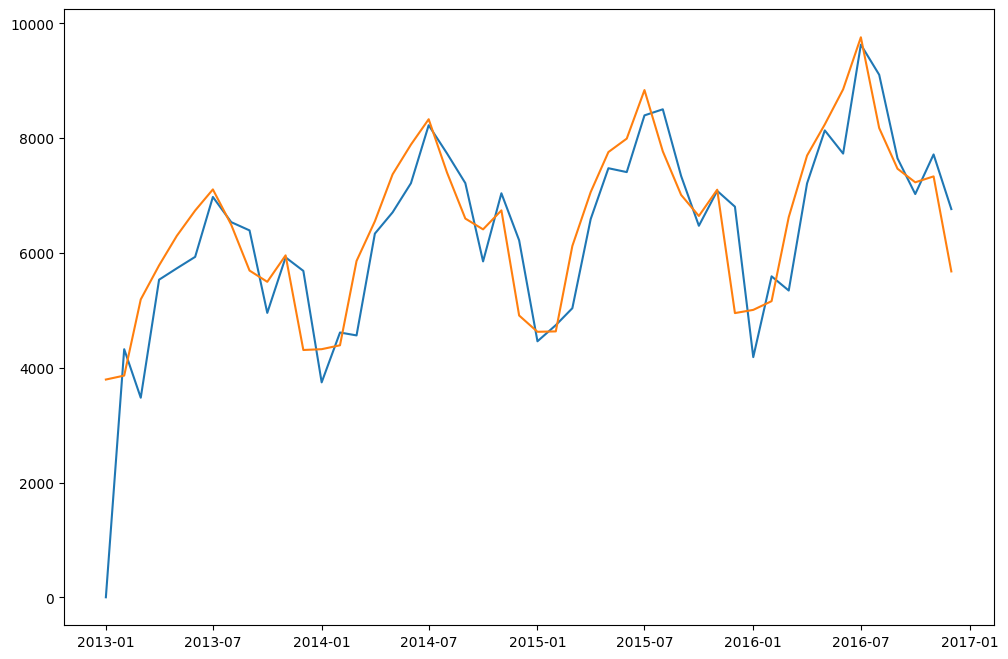

In [47]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(training,order=(2,1,3))
res=model.fit()
print(res.summary())
plt.plot(res.predict())
plt.plot(training)
plt.show()


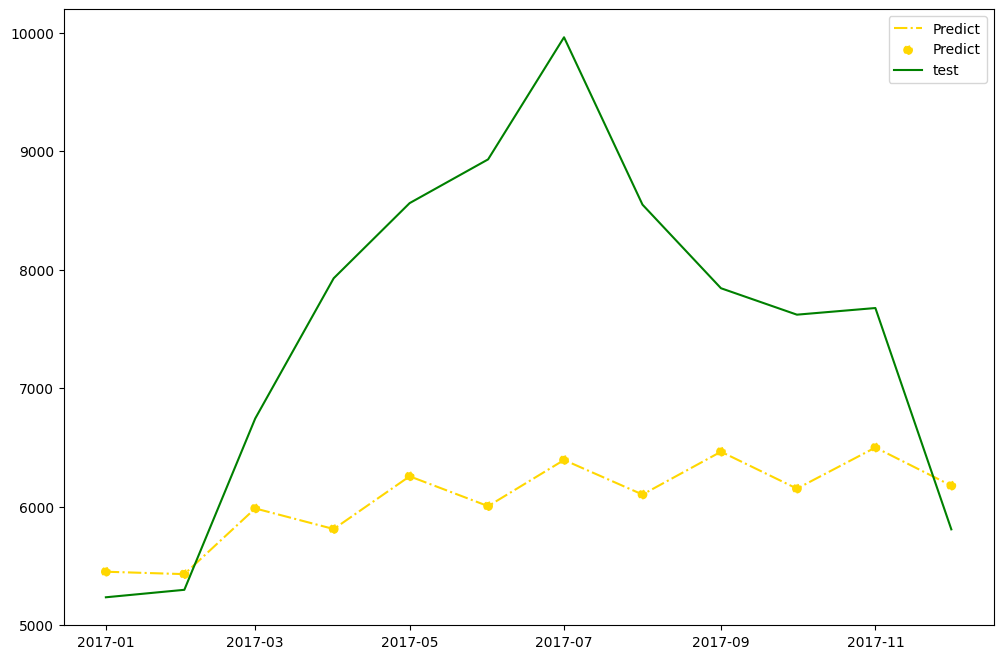

In [48]:
forecast_data=res.forecast(steps=len(test),alpha=0.05)
pred_y=forecast_data
test_y=test

plt.plot(pred_y,color="gold",linestyle='dashdot',label="Predict")
plt.scatter(pred_y.index,pred_y,color="gold",linestyle='dashdot',label="Predict")
plt.plot(test_y,color="green",label="test")
plt.legend()
plt.show()

In [49]:
from pmdarima import auto_arima

auto_model= auto_arima(training, step_p=0, d=1,start_q=0,max_p=3,max_q=3,start_P=0,start_Q=0,max_P=3,max_Q=3,m=12,seasonal=True,information_crierion='aic',trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=482.616, Time=0.03 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=481.846, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=482.652, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.466, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=483.637, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=483.669, Time=0.02 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=481.031, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=482.740, Time=0.08 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=482.682, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=480.687, Time=0.02 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=482.403, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=48

Epoch [1/100] | Loss: 0.000254
Epoch [11/100] | Loss: 0.000209
Epoch [21/100] | Loss: 0.000029
Epoch [31/100] | Loss: 0.000029
Epoch [41/100] | Loss: 0.000029
Epoch [51/100] | Loss: 0.000029
Epoch [61/100] | Loss: 0.000029
Epoch [71/100] | Loss: 0.000029
Epoch [81/100] | Loss: 0.000029
Epoch [91/100] | Loss: 0.000029


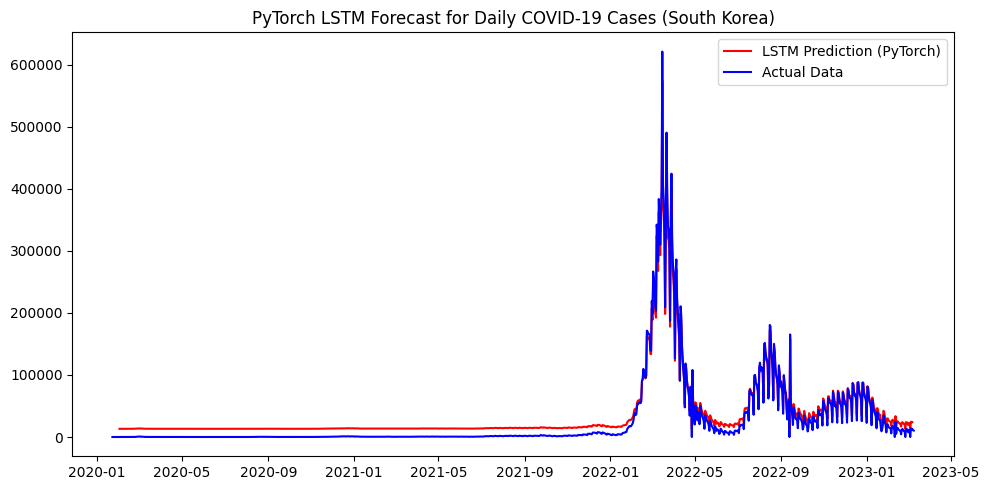

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ========================================
# 1️⃣ 데이터 로드 및 전처리
# ========================================
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_cases.csv"
df = pd.read_csv(url)

korea_data = df[['date', 'South Korea']].dropna()
korea_data['date'] = pd.to_datetime(korea_data['date'])
korea_data.set_index('date', inplace=True)
offset=10
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(korea_data['South Korea'].values[offset:].reshape(-1, 1))

# ========================================
# 2️⃣ LSTM 입력 데이터 구성 함수
# ========================================
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 1
X, y = create_dataset(scaled_data, time_step)

# reshape to (samples, time_step, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# numpy → torch tensor
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).view(-1, 1)

# ========================================
# 3️⃣ PyTorch LSTM 모델 정의
# ========================================
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=150, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # fully connected layers
        self.fc1 = nn.Linear(hidden_size, 125)
        self.fc2 = nn.Linear(125, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]   # 마지막 시점(hidden state)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

model = LSTMModel(input_size=1, hidden_size=50, num_layers=2, output_size=1)

# ========================================
# 4️⃣ 손실함수 & 옵티마이저
# ========================================
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ========================================
# 5️⃣ 학습 루프
# ========================================
epochs = 100
batch_size = 50
n = X_tensor.shape[0]

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0

    for i in range(0, n, batch_size):
        X_batch = X_tensor[i:i+batch_size]
        y_batch = y_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    if epoch%10==0:
        print(f"Epoch [{epoch+1}/{epochs}] | Loss: {epoch_loss/n:.6f}")

# ========================================
# 6️⃣ 예측
# ========================================
model.eval()
with torch.no_grad():
    predictions = model(X_tensor).detach().numpy()

# 역정규화
predictions = scaler.inverse_transform(predictions)
actual = korea_data['South Korea'].values

# ========================================
# 7️⃣ 시각화
# ========================================
plt.figure(figsize=(10, 5))
plt.plot(korea_data.index[offset:offset+len(predictions)], predictions, label='LSTM Prediction (PyTorch)', color='red')
plt.plot(korea_data.index, actual, label='Actual Data', color='blue')
plt.legend()
plt.title('PyTorch LSTM Forecast for Daily COVID-19 Cases (South Korea)')
plt.tight_layout()
plt.show()
